# Detectores de bordas
Adaptado dos exemplos de Moacir A. Ponti, ICMC/USP, 2021)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
img1 = cv2.imread("pattern.png")
img2 = cv2.imread("gradient_noise.png")
img3 = cv2.imread("board.jpg")
img4 = cv2.imread("lena.png")


#so convertendo devido ao BGR do opencv
img1_pb = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
img2_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_pb = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY) 


# Filter2D

Sintaxe: 

filter2D (src, dst, ddepth, kernel)

#### Parâmetros:

* Src – A imagem de origem na qual aplicar o filtro.
* Dst – Nome da imagem de saída após a aplicação do filtro
* Ddepth – Profundidade da imagem de saída [-1 dará a profundidade da imagem de saída igual à imagem de entrada]
* Kernel – A matriz 2D com a qual queremos que a imagem convolua.


Usando esta função, podemos criar uma convolução entre a imagem e o kernel fornecido para criar filtros como suavização e desfoque, nitidez e detecção de borda em uma imagem. Esta função irá simplesmente convoluir a matriz 2D com a imagem em nível de pixel e produzir uma imagem de saída. Para entender esse conceito, primeiro examinaremos o conceito de kernel.

## Sobel

Text(0.5, 1.0, 'Sobel')

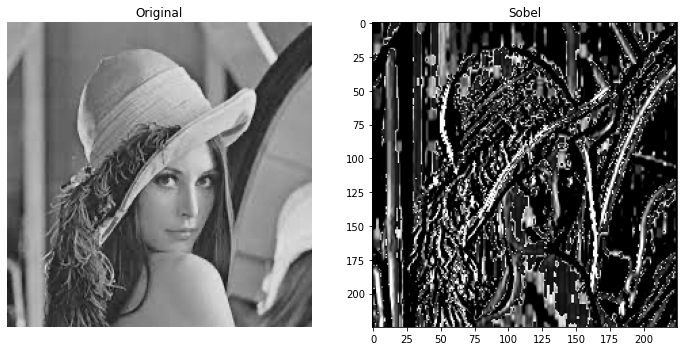

In [9]:
import math

kernelx = np.array([[1, -2, -1],[0,0,0],[1, 2, 1]])
kernely = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
#ao inves de usar a funcao convolucional dos exemplos acima, vc define o valor do filtro e usa no filter2D
img_sobel = cv2.filter2D(img4_pb, -1, kernelx)
img_sobely = cv2.filter2D(img4_pb, -1, kernely)
img_sobel = img_sobelx + img_sobely

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_sobel, cmap="gray", vmin=0, vmax=255)
plt.title("Sobel")

Text(0.5, 1.0, 'Original')

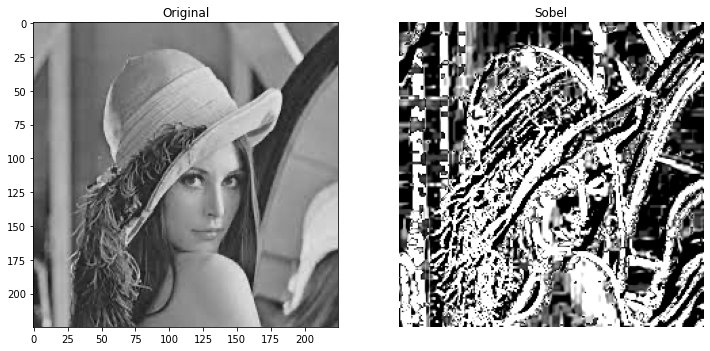

In [5]:
#ksize = janela 5x5


img_sobelx = cv2.Sobel(img4_pb,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img4_pb,cv2.CV_8U,0,1,ksize=5)
sobel = img_sobelx + img_sobely

plt.figure(figsize=(12,12)) 
plt.subplot(122)
plt.imshow(sobel, cmap="gray", vmin=0, vmax=255)
plt.title("Sobel")
plt.axis('off')

plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")

## Prewitt

Text(0.5, 1.0, 'Prewitt')

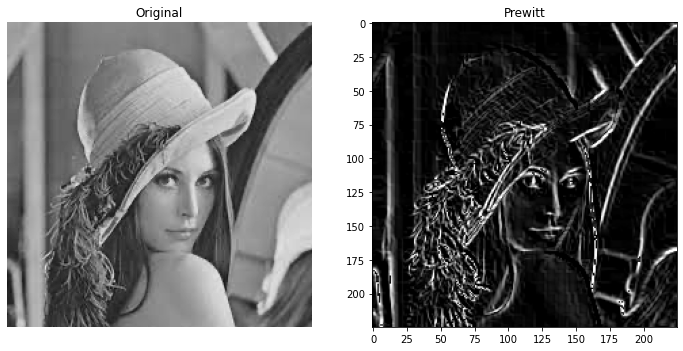

In [6]:
#FIltro de Prewitt nao tem no opencv, mas é so definir o valor do filtro x e y e somar os dois. 
import math

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#ao inves de usar a funcao convolucional dos exemplos acima, vc define o valor do filtro e usa no filter2D
img_prewittx = cv2.filter2D(img4_pb, -1, kernelx)
img_prewitty = cv2.filter2D(img4_pb, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_prewitt, cmap="gray", vmin=0, vmax=255)
plt.title("Prewitt")


Text(0.5, 1.0, 'Roberts')

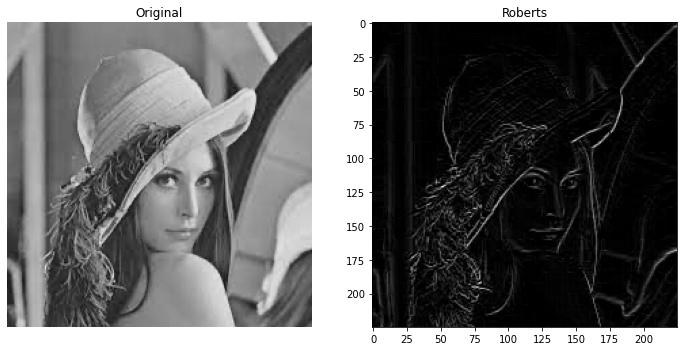

In [8]:
#FIltro de Prewitt nao tem no opencv, mas é so definir o valor do filtro x e y e somar os dois. 
import math

kernelx = np.array([[1,0], [0,-1]])
kernely = np.array([[0,1], [-1,0]])
#ao inves de usar a funcao convolucional dos exemplos acima, vc define o valor do filtro e usa no filter2D
img_robertsx = cv2.filter2D(img4_pb, -1, kernelx)
img_robertsy = cv2.filter2D(img4_pb, -1, kernely)
img_roberts = img_robertsx + img_robertsy

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_roberts, cmap="gray", vmin=0, vmax=255)
plt.title("Roberts")

## Canny 

Como já foi detalhado acima, costumamos usar o operador de sobel e prewitt para calcular o gradiente.
Como forma de simplificar o resultado final costumamos reduzir a borda pra minima possivel. 
Como exatamente o algoritmo sabe se uma borda fraca está conectada a uma borda forte? O algoritmo de borda Canny determina isso considerando cada pixel de borda fraco e seus 8 pixels vizinhos. Se qualquer um de seus pixels adjacentes fizer parte de uma borda forte, considera-se que ele está conectado a uma borda forte. Assim, este pixel é preservado em nosso resultado final. Em contraste, se nenhum dos pixels vizinhos for forte, presume-se que não faz parte de uma aresta forte e, portanto, é suprimido.
Decidir o que é realmente borda e o que é ruído. 
Uma primeira abordagem é definir um limite, acima dele tudo é
uma borda verdadeira e abaixo dele apagamos tudo

Após alguma experimentação, escolho 100 e 200 para nossos valores de limite baixo e alto, respectivamente. Na minha opinião, esses valores produzem o melhor resultado. No entanto, eles são um tanto subjetivos, então eu o encorajo a experimentar outros. Você pode encontrar outros valores de limite que produzem resultados melhores!


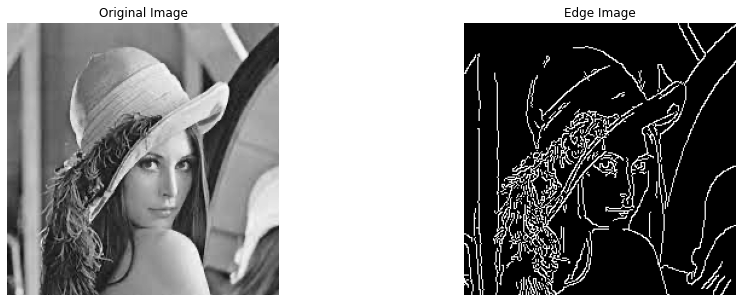

In [57]:
edges = cv2.Canny(img4_pb,100,200)

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(img4_pb,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('off')
plt.show()